In [1]:
import warnings

warnings.simplefilter("ignore")

In [2]:
import cv2 
import tensorflow as tf 
import os
from matplotlib import pyplot as plt 
import numpy as np 

In [4]:
mainDirectory = "C:/Users/laksh/Downloads/BrainImageDetection"

In [6]:
imageHeight = 256
imageWidth = 256

tumourCategories = ["BrainImages", "NotBrainImage"] 

BrainImagesData = []
NotBrainImageData = []

for classess in tumourCategories:
    pathDirectory = os.path.join(mainDirectory, classess)
    for image in os.listdir(path=pathDirectory):
       # Taking images of all image directories
       image_array = cv2.imread(os.path.join(pathDirectory, image))
       image_array = cv2.resize(image_array, (imageHeight, imageWidth))
       if classess == "BrainImages":
         BrainImagesData.append(image_array)
       elif classess == "NotBrainImage":
         NotBrainImageData.append(image_array)


BrainImagesData = np.array(BrainImagesData)
NotBrainImageData = np.array(NotBrainImageData)

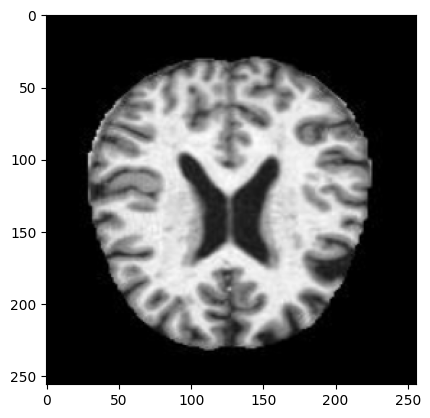

In [12]:
plt.imshow(BrainImagesData[20])

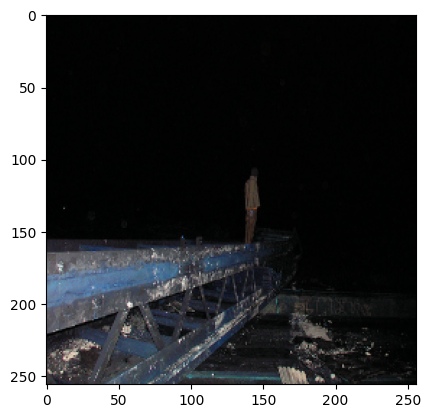

In [13]:
plt.imshow(NotBrainImageData[20])

### Using Glaussian Blur for noice Cancellation

In [14]:
import cv2
import numpy as np

blurred_brain_images = []
for image in BrainImagesData:
    blurred_image = cv2.GaussianBlur(image, (5, 5), 0) 
    blurred_brain_images.append(blurred_image)
blurred_brain_images = np.array(blurred_brain_images)


blurred_not_brain_images = []
for image in NotBrainImageData:
    blurred_image = cv2.GaussianBlur(image, (5, 5), 0) 
    blurred_not_brain_images.append(blurred_image)
blurred_not_brain_images = np.array(blurred_not_brain_images)

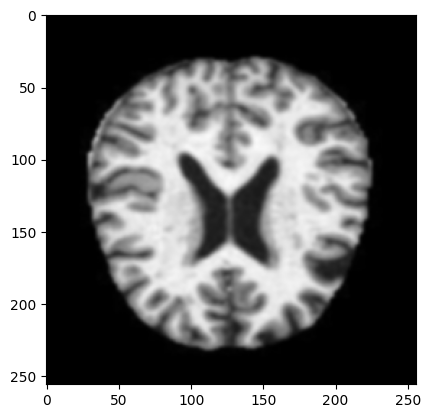

In [17]:
plt.imshow(blurred_brain_images[20])

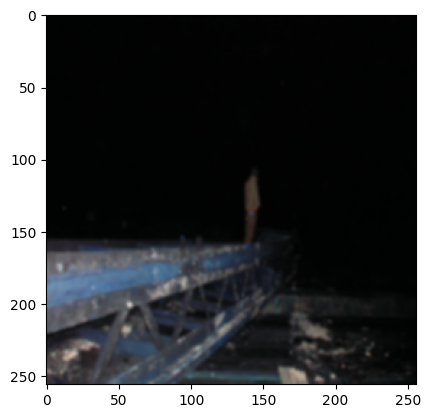

In [18]:
plt.imshow(blurred_not_brain_images[20])

In [20]:
brainImageData = blurred_brain_images
notBrainImageData = blurred_not_brain_images

import gc  
gc.collect()

tumourCategories = ["BrainImage", "NotBrainImage"]

allImages = np.concatenate([brainImageData, notBrainImageData], axis=0)

allLabels = np.concatenate([
    np.full(len(brainImageData), "BrainImage"),   
    np.full(len(notBrainImageData), "NotBrainImage"), 
], axis=0)

Text(0.5, 1.0, 'BrainImage')

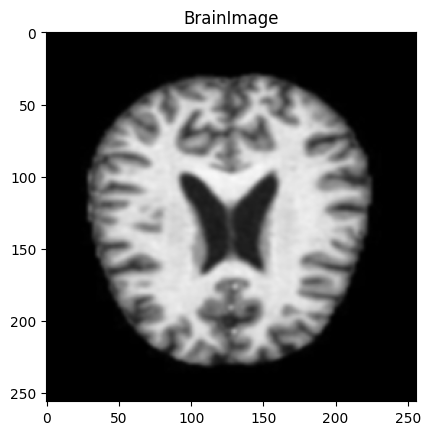

In [24]:
plt.imshow(allImages[0])
plt.title(allLabels[0])

Text(0.5, 1.0, 'NotBrainImage')

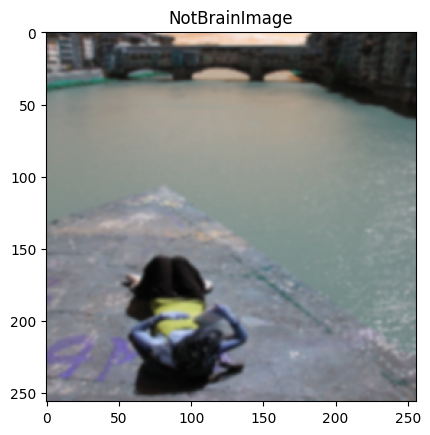

In [25]:
plt.imshow(allImages[35000])
plt.title(allLabels[35000])

### Brain image recognition model building

In [41]:
allImages.shape

(60830, 256, 256, 3)

In [51]:
import gc 
gc.collect()

from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(allImages, allLabels, test_size=0.3, random_state=4) 

In [52]:
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((42581, 256, 256, 3), (18249, 256, 256, 3), (42581,), (18249,))

In [53]:
import pandas as pd 
test_distrbution = pd.DataFrame(test_y)
train_distribution = pd.DataFrame(train_y)

In [54]:
train_distribution[0].value_counts() 

0
NotBrainImage    22363
BrainImage       20218
Name: count, dtype: int64

In [55]:
test_distrbution[0].value_counts()

0
NotBrainImage    9420
BrainImage       8829
Name: count, dtype: int64

In [56]:
from sklearn.preprocessing import LabelEncoder
# Use fit_transform on the training set
labelEncoder = LabelEncoder()
train_y_encoded = labelEncoder.fit_transform(train_y)

# Use transform on the test set
test_y_encoded = labelEncoder.transform(test_y)

# Main directory to store training and testing data
mainDataDirectory = "C:/Users/laksh/Downloads/BrainImageDetection/FinalData"

# Making two directories for both training and testing data sets
trainDirectory = os.path.join(mainDataDirectory, 'Train')
testDirectory = os.path.join(mainDataDirectory, 'Test')

# Categories of tumour classification
brainImages = ["BrainImages", "NotBrainImage"]

# Creating the subdirectories by checking whether they already exist
for category in brainImages:
    os.makedirs(os.path.join(trainDirectory, category), exist_ok=True)
    os.makedirs(os.path.join(testDirectory, category), exist_ok=True)

# Save training images
for i in range(len(train_x)):
    category = brainImages[int(train_y_encoded[i])]
    filename = f"{category}_train_{i}.jpg"
    filepath = os.path.join(trainDirectory, category, filename)
    cv2.imwrite(filepath, train_x[i])

In [57]:
# Save testing images
for i in range(len(test_x)):
    category = brainImages[int(test_y_encoded[i])]
    filename = f"{category}_test_{i}.jpg"
    filepath = os.path.join(testDirectory, category, filename)
    cv2.imwrite(filepath, test_x[i]) 

In [3]:
import gc

brainImages = ["BrainImages", "NotBrainImage"]
# Main directory where data is saved
mainDataDirectory = "C:/Users/laksh/Downloads/BrainImageDetection/FinalData"

# Directories for training and testing data
trainDirectory = os.path.join(mainDataDirectory, 'Train')
testDirectory = os.path.join(mainDataDirectory, 'Test')

# Function to read images from a directory
def read_images_from_directory(directory):
    images = []
    labels = []
    for category in brainImages:
        category_path = os.path.join(directory, category)
        label = brainImages.index(category)
        for filename in os.listdir(category_path):
            image_path = os.path.join(category_path, filename)
            image = cv2.imread(image_path)
            
            images.append(image)
            if label == 0:
                labels.append("BrainImages")
            elif label == 1:
                labels.append("NotBrainImage")
            
    return images, labels

In [4]:
# Read training images
train_x, train_y = read_images_from_directory(trainDirectory)

# Read testing images
test_x, test_y = read_images_from_directory(testDirectory)

# Convert the lists to numpy arrays
train_x = np.array(train_x)
train_y = np.array(train_y)
test_x = np.array(test_x)
test_y = np.array(test_y)

In [5]:
train_y.shape, train_x.shape, test_x.shape, test_y.shape

((42581,), (42581, 256, 256, 3), (18249, 256, 256, 3), (18249,))

In [6]:
from keras.preprocessing.image import img_to_array
from PIL import Image


train_x_gray = []
for img in train_x:
    img_gray = Image.fromarray(img).convert('L')
    train_x_gray.append(img_to_array(img_gray))

test_x_gray = []
for img in test_x:
    img_gray = Image.fromarray(img).convert('L')
    test_x_gray.append(img_to_array(img_gray))

train_x = np.array(train_x_gray)
test_x = np.array(test_x_gray)

Text(0.5, 1.0, 'BrainImages')

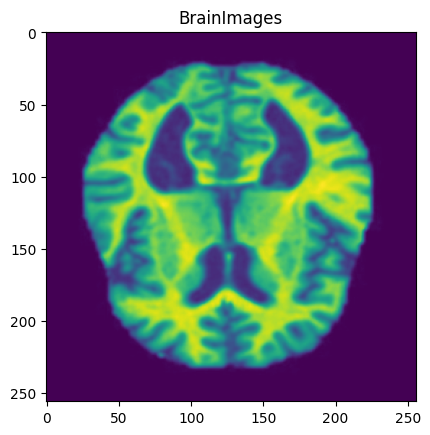

In [7]:
plt.imshow(train_x[0])
plt.title(train_y[0])

Text(0.5, 1.0, 'NotBrainImage')

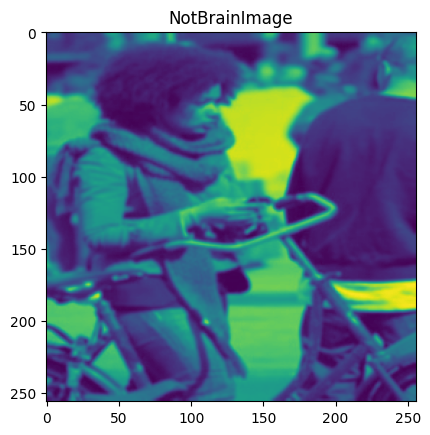

In [8]:
plt.imshow(train_x[25000])
plt.title(train_y[25000])

In [9]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
# Map string labels to integer labels
label_mapping = {'BrainImages': 1, 'NotBrainImage': 0}

# Convert string labels to integer labels
train_y = [label_mapping[label] for label in train_y]
test_y = [label_mapping[label] for label in test_y]

# Convert labels to one-hot encoded format
train_y_one_hot = to_categorical(train_y, num_classes=2) 
test_y_one_hot = to_categorical(test_y, num_classes=2)

In [10]:
train_x.shape, test_x.shape

((42581, 256, 256, 1), (18249, 256, 256, 1))

In [11]:
import gc 
gc.collect()

0

In [12]:
import numpy as np
from keras import models
from keras import layers
from keras import optimizers

# Define the model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2, activation='softmax')) 

# Compile the model
model.compile(optimizer=optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Define batch size
batch_size = 8

# Train the model
history = model.fit(train_x, train_y_one_hot, epochs=5, batch_size=batch_size, validation_data=(test_x, test_y_one_hot))



Epoch 1/5


5323/5323 [==============================] - 2123s 398ms/step - loss: 0.2441 - accuracy: 0.9889 - val_loss: 0.0094 - val_accuracy: 0.9979
Epoch 2/5
5323/5323 [==============================] - 1994s 375ms/step - loss: 0.2086 - accuracy: 0.9875 - val_loss: 0.0951 - val_accuracy: 0.9740
Epoch 3/5
5323/5323 [==============================] - 1981s 372ms/step - loss: 0.0333 - accuracy: 0.9947 - val_loss: 0.0148 - val_accuracy: 0.9972
Epoch 4/5
5323/5323 [==============================] - 1980s 372ms/step - loss: 0.0249 - accuracy: 0.9954 - val_loss: 0.0219 - val_accuracy: 0.9971
Epoch 5/5
5323/5323 [==============================] - 1968s 370ms/step - loss: 0.0371 - accuracy: 0.9960 - val_loss: 0.0208 - val_accuracy: 0.9982


In [13]:
model.save('brain_image_detection.h5')

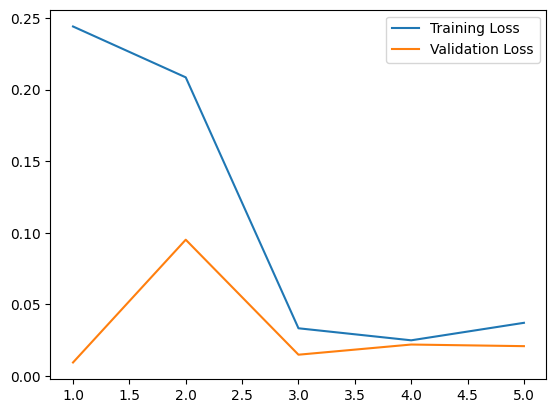

In [14]:
epochs = np.array([x for x in range(1, 6, 1)])
plt.plot(epochs, history.history["loss"], label="Training Loss")
plt.plot(epochs, history.history["val_loss"], label="Validation Loss")
plt.legend()

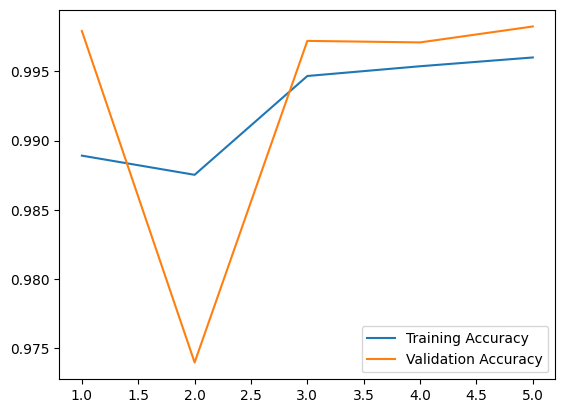

In [15]:
epochs = np.array([x for x in range(1, 6, 1)])
plt.plot(epochs, history.history["accuracy"], label="Training Accuracy")
plt.plot(epochs, history.history["val_accuracy"], label="Validation Accuracy")
plt.legend()

In [16]:
from keras.models import load_model

# Load the model
model = load_model('brain_image_detection.h5')

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import itertools

label_mapping = {'BrainImages': 1, 'NotBrainImage': 0}

# Make predictions on the test set
predictions = model.predict(test_x)
predicted_classes = np.argmax(predictions, axis=1)

571/571 [==============================] - 135s 235ms/step


In [18]:
# Convert one-hot encoded test labels back to integers
true_classes = test_y

# Calculate confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
cm

array([[9401,   19],
       [  13, 8816]], dtype=int64)

Text(50.72222222222221, 0.5, 'True Class')

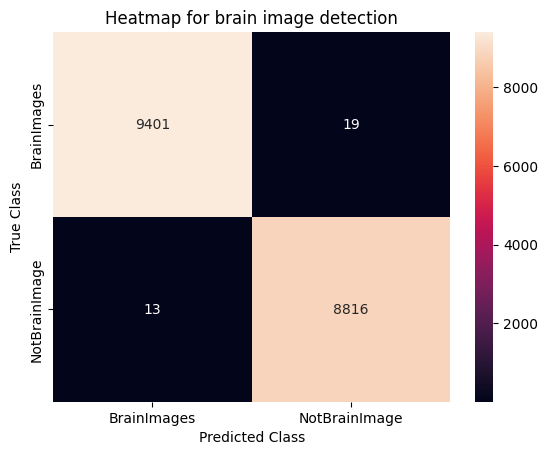

In [24]:
import seaborn as sns

labels = ["BrainImages", 'NotBrainImage'] 

sns.heatmap(cm, xticklabels=labels, yticklabels=labels, annot=True, fmt="0.0f")

plt.title("Heatmap for brain image detection")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")

In [26]:
from sklearn.metrics import classification_report
import pandas as pd 

# Mapping actual and predicted classes to disease names
actual_classes = [labels[x] for x in true_classes]
predict_classes = [labels[x] for x in predicted_classes]

# Generate classification report
report = classification_report(actual_classes, predict_classes, output_dict=True)

# Convert classification report to DataFrame
classification_df = pd.DataFrame(report)

classification_df

,BrainImages,NotBrainImage,accuracy,macro avg,weighted avg
precision,0.998619,0.997849,0.998246,0.998234,0.998247
recall,0.997983,0.998528,0.998246,0.998255,0.998246
f1-score,0.998301,0.998188,0.998246,0.998245,0.998246
support,9420.000000,8829.000000,0.998246,18249.000000,18249.000000


In [27]:
print(classification_df)

           BrainImages  NotBrainImage  accuracy     macro avg  weighted avg
precision     0.998619       0.997849  0.998246      0.998234      0.998247
recall        0.997983       0.998528  0.998246      0.998255      0.998246
f1-score      0.998301       0.998188  0.998246      0.998245      0.998246
support    9420.000000    8829.000000  0.998246  18249.000000  18249.000000


In [28]:
import numpy as np

label_mapping = {0:'NotBrainImage', 1:'BrainImages'}
image = np.expand_dims(train_x[850], axis=0) 
class_name = np.argmax(model.predict(image))
class_name

1/1 [==============================] - 0s 63ms/step


1

Text(0.5, 1.0, 'BrainImages')

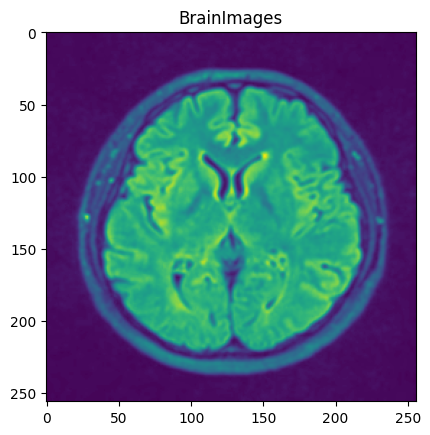

In [29]:
plt.imshow(train_x[850])
plt.title(label_mapping[train_y[850]])

In [32]:
image = np.expand_dims(train_x[25200], axis=0) 
class_name = np.argmax(model.predict(image))
class_name

1/1 [==============================] - 0s 63ms/step


0

Text(0.5, 1.0, 'NotBrainImage')

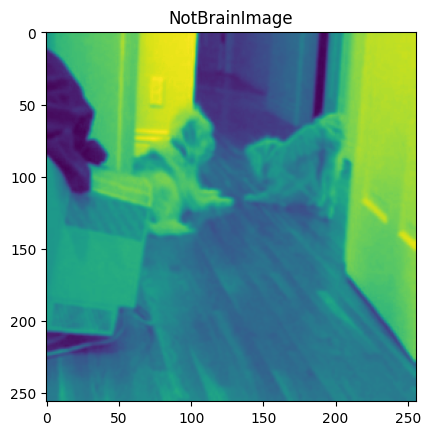

In [33]:
plt.imshow(train_x[25200])
plt.title(label_mapping[train_y[25200]])